<a href="https://colab.research.google.com/github/eugenechi/mgmt467-analytics-portfolio/blob/main/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

Purpose: To understand the data, find patterns, identify anomalies, and generate hypotheses. It answers the question, “What could I find in this data?”
Audience: Typically the data analyst, data scientist, or small internal teams.
Polish: Low; charts are often messy, raw, and quickly iterated upon.
Key Characteristic: High interactivity and flexibility; the analyst is seeking insights and continuously refining the visual approach.
---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
Bar Chart
Question archetype: Comparison and Ranking ("Which categories are biggest?")
Data shape: Categorical data versus a measured variable.
Pitfalls: Overcrowding (too many bars), inappropriate baseline (must start at zero).
Alternatives: Column chart (vertical bars), Pareto chart, Lollipop chart.
Line Chart
Question archetype: Trend over Time ("How has X changed in the last year?")
Data shape: Time series data (date/time field vs. a measured variable).
Pitfalls: Using too many lines (clutter), using the wrong scale/non-linear axis.
Alternatives: Area chart, Slope graph.
Scatter Plot
Question archetype: Relationship and Correlation ("Does X impact Y?")
Data shape: Two measured variables (X vs. Y) per observation.
Pitfalls: Overplotting (too many points obscuring patterns), mistaking correlation for causation.
Alternatives: Bubble chart, Heatmap.
Histogram
Question archetype: Distribution and Frequency ("How are values distributed?")
Data shape: A single continuous measured variable (binned into intervals).
Pitfalls: Choosing the wrong bin size, confusing it with a bar chart.
Alternatives: Density plot, Box plot.
Map (Choropleth/Symbol Map)
Question archetype: Location and Geography ("Where is X happening?")
Data shape: Geographic data (country, state, latitude/longitude) versus a measured variable.
Pitfalls: Misrepresenting area (larger states/countries dominate visually), using absolute counts instead of rates/density.
Alternatives: Geographically constrained bar charts, Hexbin maps.
---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
KPI 1: Load Factor (Percentage of Seats Occupied)
Why it matters: Measures capacity utilization and efficiency. Direct driver of profitability.
Best chart: Gauge/Big Number with Sparkline
Drill-down fields: Route (City Pair), Aircraft Type, Time of Day
KPI 2: Yield (Revenue per Passenger Mile)
Why it matters: Core measure of pricing power and revenue quality. Indicates if the airline is profitably filling seats.
Best chart: Line Chart (Trended monthly, benchmarked against previous year or target)
Drill-down fields: Geographic Region, Booking Class (Fare Bucket), Sales Channel
KPI 3: On-Time Departure Rate
Why it matters: Directly affects customer satisfaction, connecting flight success, and crew productivity. Key operational metric.
Best chart: Bar Chart (Comparing performance by Hub Airport/Station)
Drill-down fields: Hub Airport, Delay Reason Codes, Day of Week
KPI 4: Cost per Available Seat Mile (CASM)
Why it matters: Primary measure of operational cost efficiency. High CASM crushes profits regardless of high Load Factor/Yield.
Best chart: Key Performance Indicator (KPI) Card (Big number compared to target/budget)
Drill-down fields: Cost Category (Fuel, Labor, Maintenance), Aircraft Fleet Type, Maintenance Base
KPI 5: Cancellation Rate
Why it matters: Measures schedule reliability and drives significant customer recovery costs. High rate indicates systemic operational failures.
Best chart: Control Chart (Line Chart with UCL/LCL) (Shows performance over time with acceptable limits)
Drill-down fields: Route, Day of Week, Root Cause (e.g., Crew Shortage, Weather)


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [2]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [3]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-2538001033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')


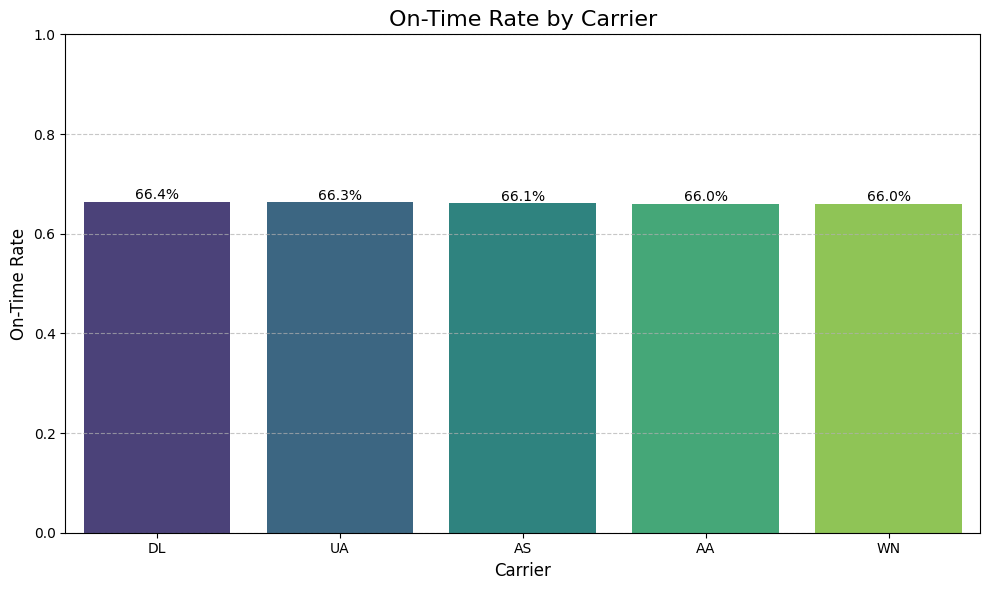

In [10]:
# Calculate on-time rate by carrier
on_time_rate_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('On-Time Rate by Carrier', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('On-Time Rate', fontsize=12)
plt.ylim(0, 1) # Set y-axis limit to 0-1 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-854523668.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='load_factor', y='route', data=top_15_routes, palette='viridis')


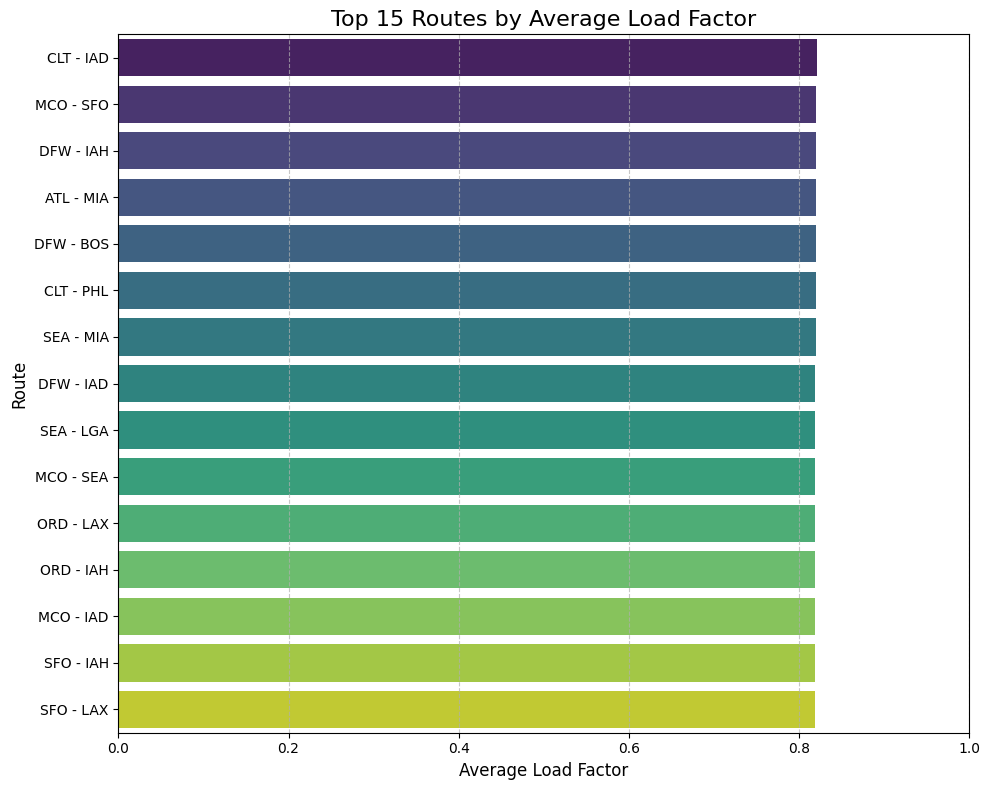

In [9]:
# Compute mean load factor by route
mean_load_factor_by_route = df_flights.groupby(['origin', 'dest'])['load_factor'].mean().reset_index()
mean_load_factor_by_route['route'] = mean_load_factor_by_route['origin'] + ' - ' + mean_load_factor_by_route['dest']

# Get top 15 routes by average load factor
top_15_routes = mean_load_factor_by_route.nlargest(15, 'load_factor')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='load_factor', y='route', data=top_15_routes, palette='viridis')

plt.title('Top 15 Routes by Average Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.xlim(0, 1) # Load factor is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

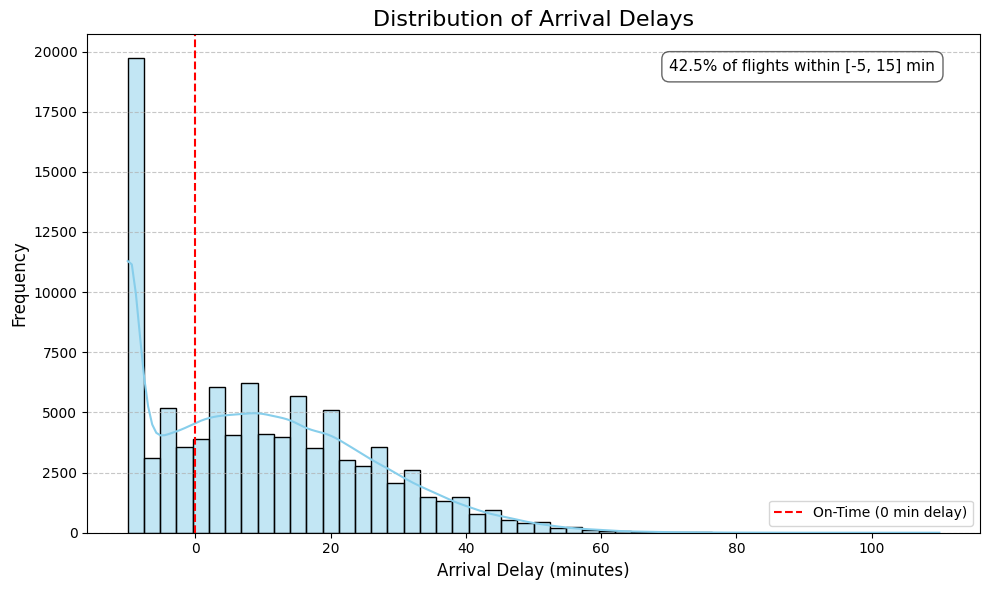

In [8]:
# Calculate percentage of flights within [-5, 15] minutes
within_range_percentage = ((df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)).mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True, color='skyblue')

# Add vertical line at 0
plt.axvline(0, color='red', linestyle='--', label='On-Time (0 min delay)')

# Add annotation for percentage within range
plt.text(0.95, 0.95, f'{within_range_percentage:.1f}% of flights within [-5, 15] min',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,
         fontsize=11, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.6))


plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

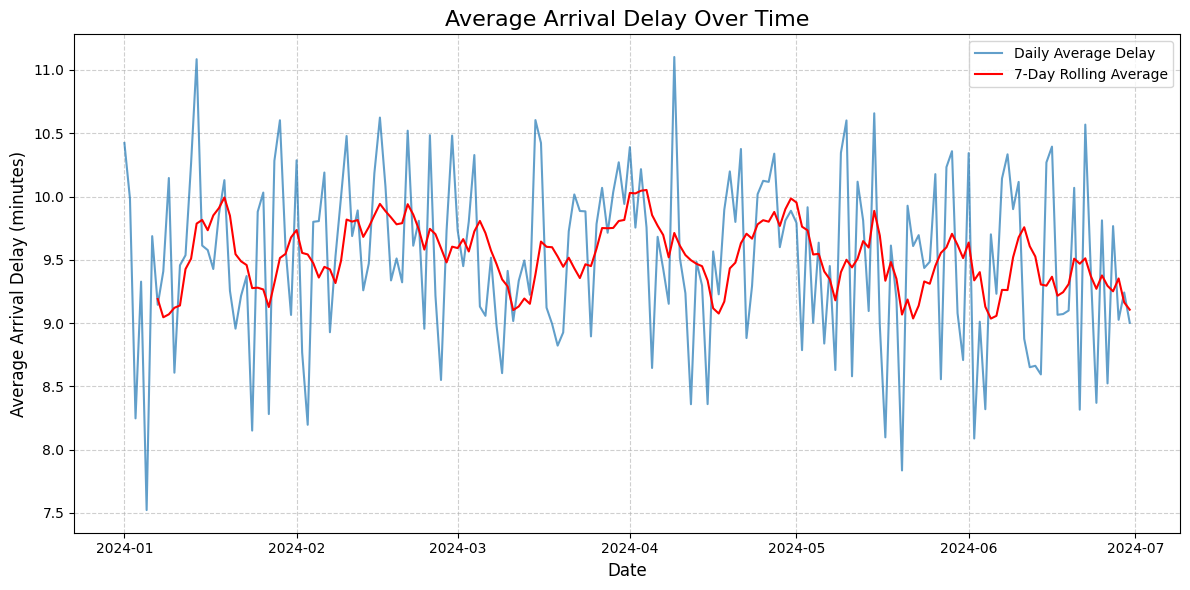

In [7]:
# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean().reset_index()

# Calculate 7-day rolling average
daily_avg_delay['rolling_avg_delay'] = daily_avg_delay['arr_delay_min'].rolling(window=7).mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_delay, x='date', y='arr_delay_min', label='Daily Average Delay', alpha=0.7)
sns.lineplot(data=daily_avg_delay, x='date', y='rolling_avg_delay', label='7-Day Rolling Average', color='red')

plt.title('Average Arrival Delay Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

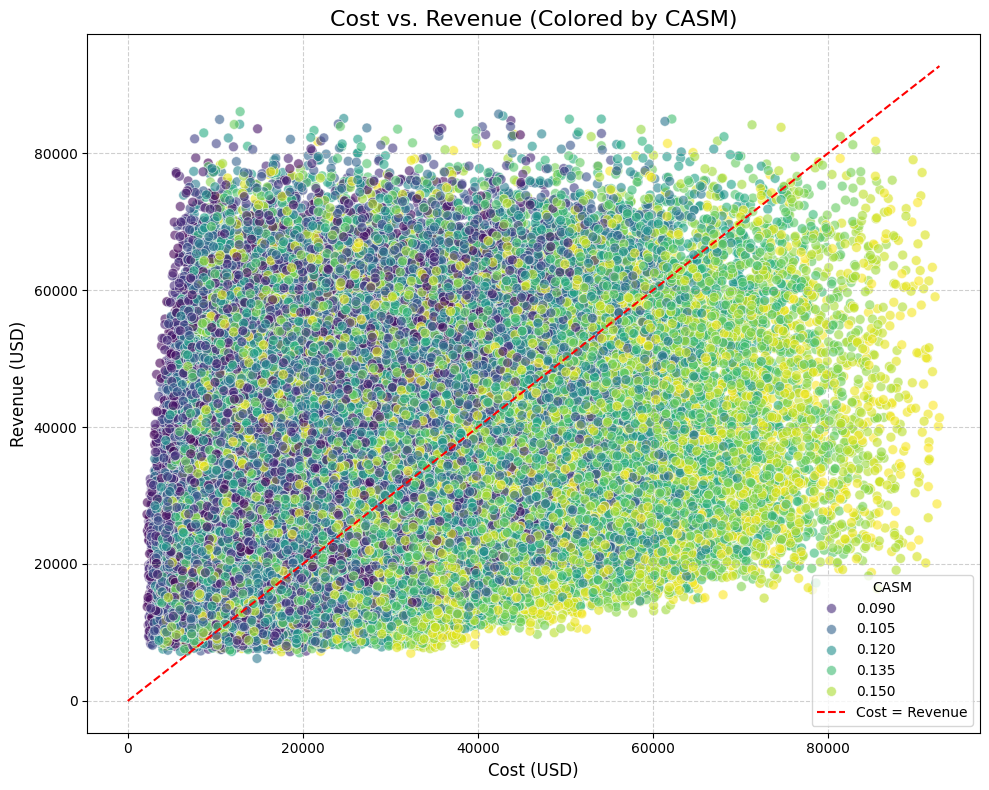

In [5]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6, s=50)

# Add diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Cost = Revenue')

plt.title('Cost vs. Revenue (Colored by CASM)', fontsize=16)
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='CASM')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [4]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
Centering the four KPI cards at the top with plain labels and consistent formats did the most for clarity; it lets viewers grasp on-time rate, delay, cancel rate, and load factor in one glance before diving into charts. Using route and carrier filters side by side (and enabling cross-filtering) also cut confusion because every chart responds in a predictable way. Next, I’d add small “info” notes under each KPI to lock in definitions (on-time excludes cancellations) and replace the scatter’s raw revenue and cost with margin and passenger-weighted bubbles for faster insight. I’d also standardize color by carrier across all visuals and add a compact legend to reduce cognitive load.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
